# Tomando decisiones

Python nos permite ejecutar algunas acciones en caso de que se satisfagan unas determinadas condiciones. Para ello vamos a utilizar la instrucción `if` con la cual vamos a indicarle que ejecute una cierta tarea solo en el caso de que una dada condición sea _verdadera_.

Por ejemplo, supongamos que hemos recibido el pronóstico de temperatura para las próximas tres horas y queremos que nuestro código nos avise si va a helar (temperaturas menores a 0ºC), pero que no lo haga en caso contrario.

In [2]:
temperatura_c = -5

if temperatura_c <= 0:
    print("Va a helar")

Va a helar


Ahora queremos que además nos avise que no va a helar si la temperatura es superior a los 0ºC. Esto lo podemos hacer a través de la instrucción `else`, con la cual indicamos que ejecute una cierta tarea en caso de que todas las condiciones anteriores no sean _verdaderas_.

In [3]:
if temperatura_c <= 0:
    print("Va a helar")
else:
    print("No va a helar")

Va a helar


¿Existe un tipo de variable para estas condiciones?

In [4]:
hiela = (temperatura_c <= 0)

In [5]:
hiela

True

In [6]:
type(hiela)

bool

Los `bool`s son variables binarias, es decir, solo pueden almacenar dos valores: `True` (_verdadero_) o `False` (_falso_).

> Observación:
> - Un `bool` **no** es un `str`, es decir, no es texto.

Supongamos ahora que deseamos agregar otra alerta: para altas temperaturas (digamos, mayores a 35ºC). Para esto, podemos hacer uso de la instrucción `elif`, con la cual indicamos que ejecute una determinada tarea en caso de que las condiciones **anteriores** no se satisfagan, pero que una determinada condición sí lo haga.

El nombre `elif` viene de la unión de  _else_ con _if_.

In [11]:
temperatura = 40

if temperatura <= 0:
    print("Va a helar")
elif temperatura > 35:
    print("Ola de calor")
else:
    print("Temperatura normal")

Ola de calor


Muchas veces las estructuras `if`, `elif` y `else` las usamos dentro de `for` loops.

In [7]:
temperaturas = [10, 7, 4, -1, -3, 1, 6]

for temp in temperaturas:
    if temp <= 0:
        print("Va a helar")
    elif temperatura > 35:
        print("Ola de calor")
    else:
        print("No va a helar")

No va a helar
No va a helar
No va a helar
Va a helar
Va a helar
No va a helar
No va a helar


O en funciones:

In [1]:
def alerta_temperatura(temperatura):
    """
    Imprime alertas de temperaturas muy altas o bajas
    """
    if temperatura <= 0:
        print("Va a helar")
    elif temperatura > 35:
        print("Ola de calor")
    else:
        print("Temperatura normal")

In [32]:
alerta_temperatura(40)

Ola de calor


## El signo igual

A la hora de comparar valores, Python reconoce los siguientes signos:
- `<`: menor
- `>`: mayor
- `<=`: menor o igual
- `>=`: mayor o igual
- `==`: igual

Observá que para indicar una cantidad _igual_ a otra se usa doble sígno igual para diferenciar el `=` que se utiliza para _asignar variables_.

In [33]:
numero = 2

if numero > 0:
    print("positivo")
elif numero == 0:
    print("cero")
else:
    print("negativo")

positivo


## And y or

A veces queremos definir como condición como _verdadera_ cuando dos condiciones independientes sucedan en simultáneo, pero _falsa_ si alguna de las dos es _falsa_.
Para ello podemos usar la instrucción `and`.

In [30]:
temperatura = 10

booleano = (temperatura > 0) and (temperatura <= 35)
booleano

True

Otro caso podría ser que nuestra condición sea _verdadera_ si alguna de dos condiciones independientes es _verdadera_, pero _falsa_ si ambas son _falsas_.
Para ello podemos usar la instrucción `or`.

In [31]:
temperatura = -1

booleano = (temperatura <= 0) or (temperatura > 35)
booleano

True

## Bools y Numpy

Numpy también nos permite trabajar con `bool`s, lo cual nos va a facilitar muchas tareas, como por ejemplo seleccionar subconjunto de datos de un array a partir de terminada condición.

Leamos primero los datos de temperatura provenientes de la ISA (International Standard Atmosphere).

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
np.loadtxt?

Signature:
np.loadtxt(
    fname,
    dtype=<class 'float'>,
    comments='#',
    delimiter=None,
    converters=None,
    skiprows=0,
    usecols=None,
    unpack=False,
    ndmin=0,
    encoding='bytes',
    max_rows=None,
)
Docstring:
Load data from a text file.

Each row in the text file must have the same number of values.

Parameters
----------
fname : file, str, or pathlib.Path
    File, filename, or generator to read.  If the filename extension is
    ``.gz`` or ``.bz2``, the file is first decompressed. Note that
    generators should return byte strings.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must match the number of fields in
    the data-type.
comments : str or sequence of str, optional
    The characters or list of characters used to indica

Podemos utilizar el argumento `unpack` de la función `np.loadtxt()` para indicarle que queremos que las columnas estén _desempaquetadas_. El argumento `unpack` espera un valor de tipo `bool`, por ende pasamos el valor `True`.

In [7]:
altura, temperatura = np.loadtxt("temperatura_atmosferica.dat", unpack=True)

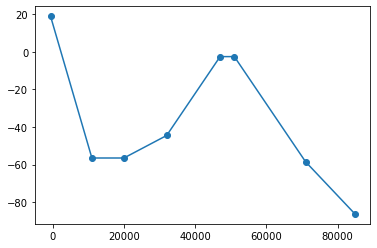

In [9]:
plt.plot(altura, temperatura, 'o-')
plt.show()

¿Qué pasa si evaluamos la siguiente línea?

In [11]:
altura < 40000

array([ True,  True,  True,  True, False, False, False, False])

Obtenemos un `array` de tipo `bool`. Es decir, es un `array` que contiene valores de tipo `bool`: `True` o `False`. Este array nos indica qué elementos del arreglo `altura` son menores a 40000m.

Podemos asignar este array a una determinada variable:

In [12]:
atmosfera_baja = altura < 40000

Y podemos usar este `array` de `bool`s para obtener otro arreglo que contenga los valores de `altura` que sean menores a 40000m.

In [38]:
altura[atmosfera_baja]

array([ -610., 11000., 20000., 32000.])

También lo podemos usar para obtener los valores de `temperatura` que correspondan a valores de altura menores a 40000m.

In [13]:
temperatura[atmosfera_baja]

array([ 19. , -56.5, -56.5, -44.5])

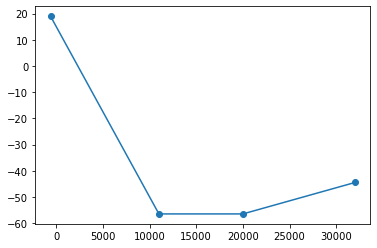

In [14]:
plt.plot(altura[atmosfera_baja], temperatura[atmosfera_baja], 'o-')
plt.show()

## Ejercicio

La estratósfera es la capa de la atmósfera comprendida entre los 12km y los 50km sobre el nivel del mar<sup>1</sup>.

1. Creá un gráfico que muestre los valores de temperatura atmosférica obtenidos de la ISA (International Standard Atmosphere) únicamente para la estratósfera.

> **Ayuda:**
>
> A la hora de querer utilizar `and` u `or` con `array`s vamos a toparnos con errores. Para evitarlo, utilizá el símbolo `&` (ampresand) para _and_ y `|` (pipe) para _or_.





<sup>1</sup> https://en.wikipedia.org/wiki/Atmosphere_of_Earth